In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import svm
import pickle


In [2]:
# Load the data and check for null values
data = pd.read_csv('Mushroom_data.csv',sep=';')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

In [3]:
#remove columns that contain a lot of null values.
data = data.drop(['spore-print-color', 'veil-color','veil-type','stem-surface','stem-root','gill-spacing','cap-surface'], axis=1)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-color             61069 non-null  object 
 4   does-bruise-or-bleed  61069 non-null  object 
 5   gill-attachment       51185 non-null  object 
 6   gill-color            61069 non-null  object 
 7   stem-height           61069 non-null  float64
 8   stem-width            61069 non-null  float64
 9   stem-color            61069 non-null  object 
 10  has-ring              61069 non-null  object 
 11  ring-type             58598 non-null  object 
 12  habitat               61069 non-null  object 
 13  season                61069 non-null  object 
dtypes: float64(3), object(11)
memory usage: 6.5+ MB


In [5]:
# Remove null values
data = data.dropna()

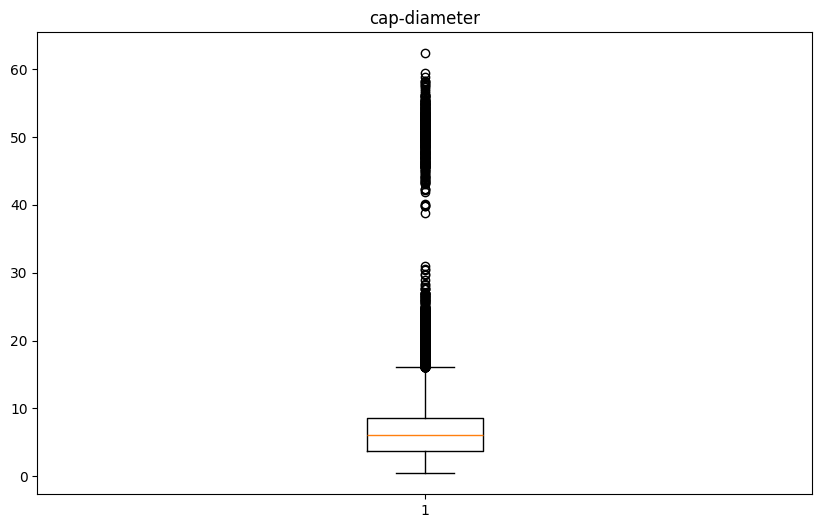

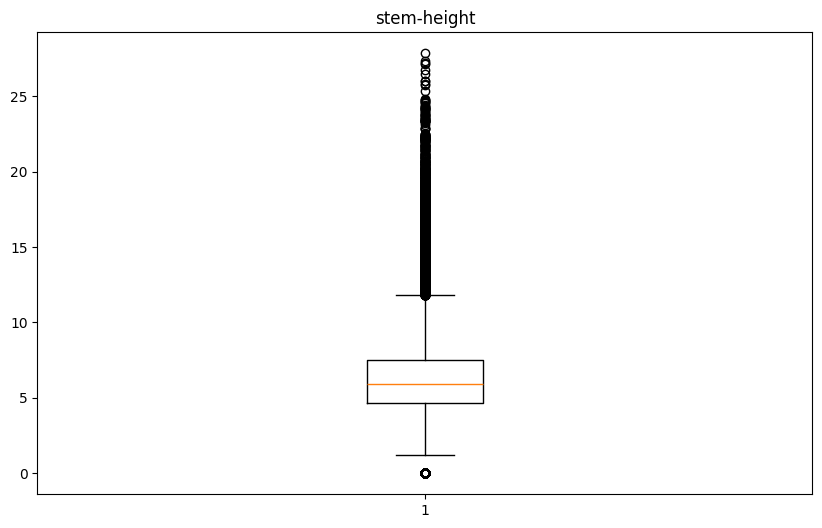

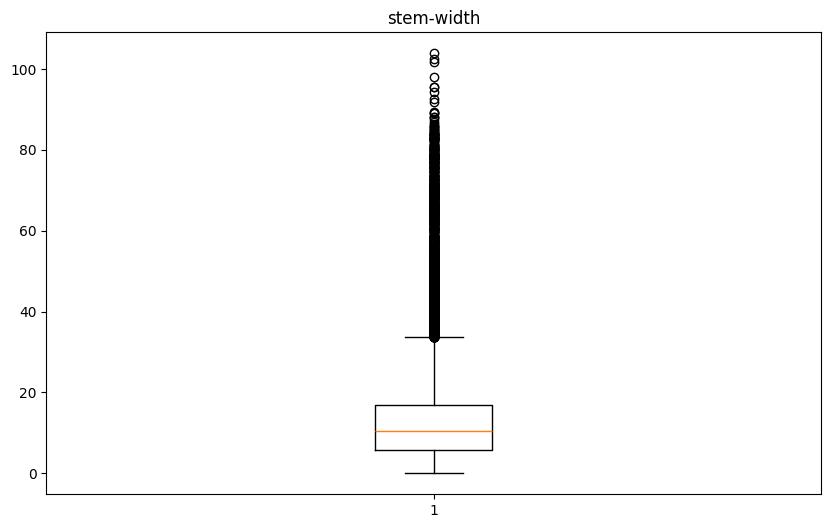

In [6]:
#check the numerical features for outliers
plt.figure(figsize=(10, 6))
plt.boxplot(data['cap-diameter'])
plt.title('cap-diameter')
plt.show()
plt.figure(figsize=(10, 6))
plt.boxplot(data['stem-height'])
plt.title('stem-height')
plt.show()
plt.figure(figsize=(10, 6))
plt.boxplot(data['stem-width'])
plt.title('stem-width')
plt.show()


In [7]:
label_encoder = LabelEncoder()
data['class'] = label_encoder.fit_transform(data['class'])
data['has-ring'] = label_encoder.fit_transform(data['has-ring'])
data['does-bruise-or-bleed'] = label_encoder.fit_transform(data['does-bruise-or-bleed'])

In [8]:
data_withoutobject = data.select_dtypes(exclude=['object'])

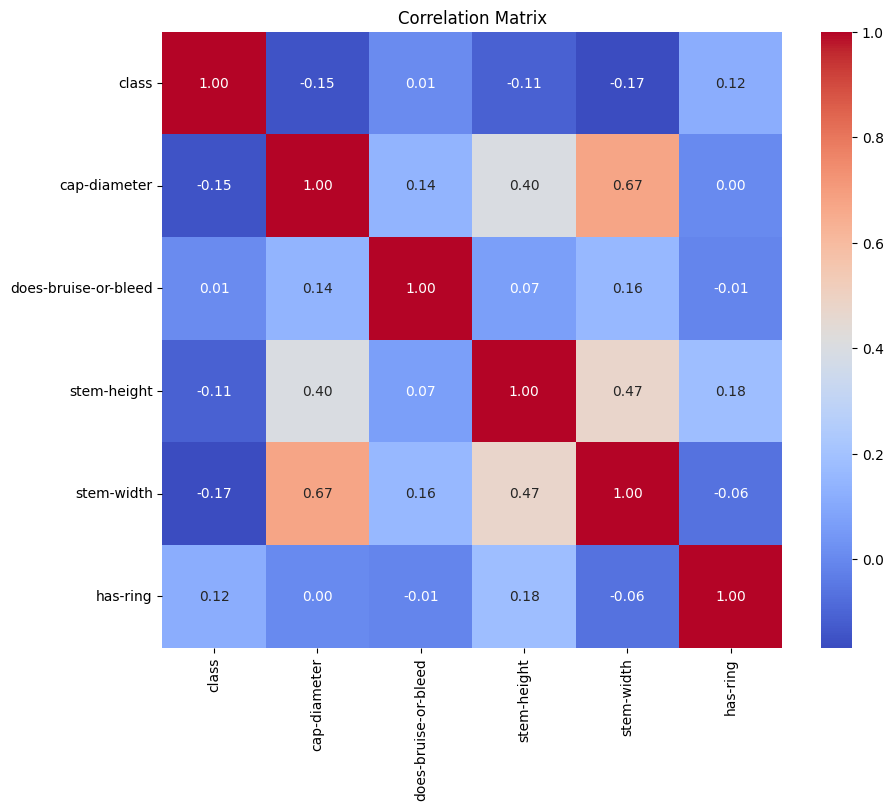

In [9]:
corr_matrix = data_withoutobject.corr()

# Визуализация корреляционной матрицы
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

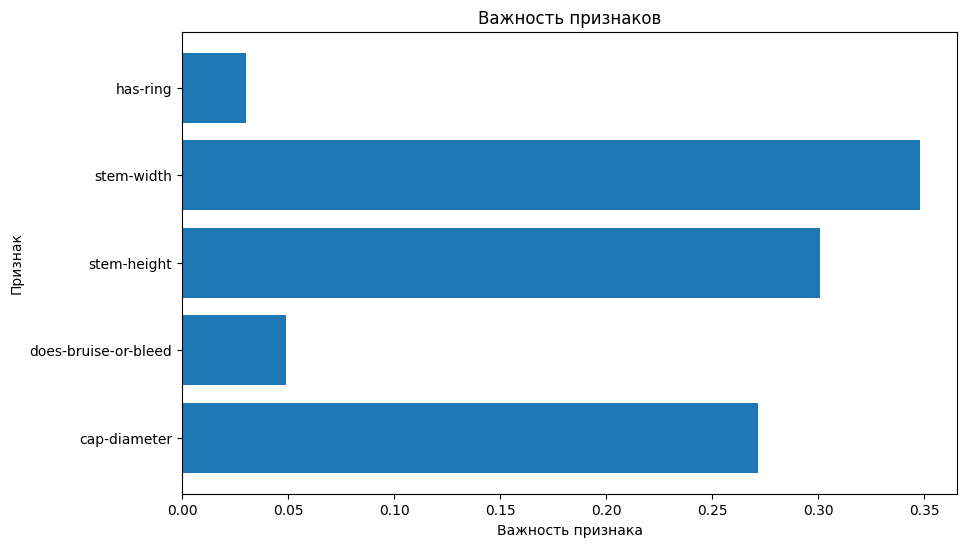

In [10]:
# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(data_withoutobject.drop('class', axis=1), data_withoutobject['class'], test_size=0.2, random_state=42)

# Оценка важности признаков с использованием случайного леса
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
feature_importances = clf.feature_importances_
# Создаем горизонтальную столбчатую диаграмму
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importances)), feature_importances, align='center')
plt.yticks(range(len(feature_importances)), data_withoutobject.drop('class', axis=1).columns)
plt.xlabel('Важность признака')
plt.ylabel('Признак')
plt.title('Важность признаков')

plt.show()

In [11]:
predictions_ensemble = clf.predict(X_test)
print(classification_report(y_test, predictions_ensemble))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86      4386
           1       0.89      0.87      0.88      5428

    accuracy                           0.87      9814
   macro avg       0.87      0.87      0.87      9814
weighted avg       0.87      0.87      0.87      9814



In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49067 entries, 0 to 61068
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 49067 non-null  int64  
 1   cap-diameter          49067 non-null  float64
 2   cap-shape             49067 non-null  object 
 3   cap-color             49067 non-null  object 
 4   does-bruise-or-bleed  49067 non-null  int64  
 5   gill-attachment       49067 non-null  object 
 6   gill-color            49067 non-null  object 
 7   stem-height           49067 non-null  float64
 8   stem-width            49067 non-null  float64
 9   stem-color            49067 non-null  object 
 10  has-ring              49067 non-null  int64  
 11  ring-type             49067 non-null  object 
 12  habitat               49067 non-null  object 
 13  season                49067 non-null  object 
dtypes: float64(3), int64(3), object(8)
memory usage: 5.6+ MB


In [13]:
mask = data['gill-color'] != 'f'
data = data[mask]

In [14]:
mask = data['stem-color'] != 'f'
data = data[mask]

In [15]:
data= pd.get_dummies(data, columns=['cap-shape','cap-color','gill-attachment','gill-color','stem-color','ring-type','habitat','season'])

In [16]:
# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(data.drop('class', axis=1), data['class'], test_size=0.2, random_state=42)

In [17]:
"""clf = svm.OneClassSVM(kernel='rbf', nu=0.1)
clf.fit(X_train)
y_pred = clf.predict(X_train)
X_train_cleaned = X_train[y_pred == 1]
Y_train_cleaned = y_train[y_pred == 1]
sns.boxplot(X_train_cleaned['cap-diameter'])
plt.title('cap-diameter')
plt.xlabel('cap-diameter')
plt.show()"""

"clf = svm.OneClassSVM(kernel='rbf', nu=0.1)\nclf.fit(X_train)\ny_pred = clf.predict(X_train)\nX_train_cleaned = X_train[y_pred == 1]\nY_train_cleaned = y_train[y_pred == 1]\nsns.boxplot(X_train_cleaned['cap-diameter'])\nplt.title('cap-diameter')\nplt.xlabel('cap-diameter')\nplt.show()"

In [18]:
#X_train_cleaned.head()

In [20]:
ensemble_model = RandomForestClassifier(random_state = 5)
#ensemble_model.fit(X_train_cleaned, Y_train_cleaned)
ensemble_model.fit(X_train, y_train)
with open('model.pkl', 'wb') as file:
    pickle.dump(ensemble_model, file)

In [21]:
predictions_ensemble = ensemble_model.predict(X_test)

In [22]:
print(classification_report(y_test, predictions_ensemble))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4128
           1       1.00      1.00      1.00      4980

    accuracy                           1.00      9108
   macro avg       1.00      1.00      1.00      9108
weighted avg       1.00      1.00      1.00      9108



In [ ]:
data.head()

,class,cap-diameter,does-bruise-or-bleed,stem-height,stem-width,has-ring,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_o,...,habitat_h,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,season_a,season_s,season_u,season_w
0,1,15.26,0,16.95,17.09,1,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,1,16.60,0,17.99,18.19,1,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,1,14.07,0,17.80,17.74,1,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,1,14.17,0,15.77,15.98,1,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
4,1,14.64,0,16.53,17.20,1,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
